## Data Scienece Miniproject
### Name: Pawar Sneha Sachin 
### Roll no: 24207148
### Bank Marketing Dataset

#### It is used to analyze & predict whether a customer will subscribe to a term deposit after a marketing campaign(a fixed-period savings investment)
#### Objectives:
#### 1. Helps banks identify which customers are more likely to subscribe to a term deposit.
#### 2. Helps banks improve future marketing strategies
#### 3. Reduces marketing costs by focusing on high-potential customers.
#### 4. Helps create personalized marketing strategies.

In [36]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# Load dataset
df = pd.read_csv("bank.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


### pre-processing

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [39]:
print("\nFirst 5 rows:\n", df.head())


First 5 rows:
    age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  


In [40]:
print("\nLast 5 rows:\n", df.tail())


Last 5 rows:
        age          job  marital  education default  balance housing loan  \
11157   33  blue-collar   single    primary      no        1     yes   no   
11158   39     services  married  secondary      no      733      no   no   
11159   32   technician   single  secondary      no       29      no   no   
11160   43   technician  married  secondary      no        0      no  yes   
11161   34   technician  married  secondary      no        0      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
11157  cellular   20   apr       257         1     -1         0  unknown   
11158   unknown   16   jun        83         4     -1         0  unknown   
11159  cellular   19   aug       156         2     -1         0  unknown   
11160  cellular    8   may         9         2    172         5  failure   
11161  cellular    9   jul       628         1     -1         0  unknown   

      deposit  
11157      no  
11158      no  
11159      no  
1

In [41]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [42]:
df.groupby(['age','loan']).count()

job  marital  education  default  balance  housing  contact  day  \
age loan                                                                     
18  no      8        8          8        8        8        8        8    8   
19  no     13       13         13       13       13       13       13   13   
20  no     19       19         19       19       19       19       19   19   
    yes     1        1          1        1        1        1        1    1   
21  no     28       28         28       28       28       28       28   28   
...       ...      ...        ...      ...      ...      ...      ...  ...   
89  no      1        1          1        1        1        1        1    1   
90  no      2        2          2        2        2        2        2    2   
92  no      2        2          2        2        2        2        2    2   
93  no      2        2          2        2        2        2        2    2   
95  no      1        1          1        1        1        1        1    1   

          month  duration  campaign  pdays  previous  poutcome  deposit  
age loan                                                                 
18  no        8         8         8      8         8         8        8  
19  no       13        13        13     13        13        13       13  
20  no       19        19        19     19        19        19       19  
    yes       1         1         1      1         1         1        1  
21  no       28        28        28     28        28        28       28  
...         ...       ...       ...    ...       ...       ...      ...  
89  no        1         1         1      1         1         1        1  
90  no        2         2         2      2         2         2        2  
92  no        2         2         2      2         2         2        2  
93  no        2         2         2      2         2         2        2  
95  no        1         1         1      1         1         1        1  

[122 rows x 15 columns]

In [61]:
# Display unique values in the 'deposit' column
print(df['deposit'].unique())

[1 0]


In [43]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical variables(categoricals columns converted into numbers)
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


### Model training

In [44]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [45]:
from sklearn.model_selection import train_test_split
# Define features and target
X = df.drop(columns=["deposit"])  # Replace "deposit" with your target column name
y = df["deposit"] 

In [46]:
# Scale numerical features(searches numercial features)
scaler = StandardScaler()
X[X.select_dtypes(include=['int64', 'float64']).columns] = scaler.fit_transform(
    X[X.select_dtypes(include=['int64', 'float64']).columns]
)


In [47]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, 
    f1_score, roc_auc_score, roc_curve, classification_report, confusion_matrix)

In [49]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),  # Enable probability for SVM
    "KNN": KNeighborsClassifier(),

}

In [50]:
# Train and evaluate models
results = {}
roc_curves = {}
conf_matrices = {}

plt.figure(figsize=(8, 6))

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Handling models that don't have predict_proba (like SVM)
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_pred_proba = model.decision_function(X_test)  # SVM's alternative to predict_proba

    # Store results (convert accuracy to percentage)
    results[name] = {
        "Accuracy (%)": round(accuracy_score(y_test, y_pred) * 100, 2),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred),
        "AUC-ROC": roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    }

Training Logistic Regression...
Training Decision Tree...
Training Random Forest...
Training SVM...
Training KNN...


<Figure size 800x600 with 0 Axes>

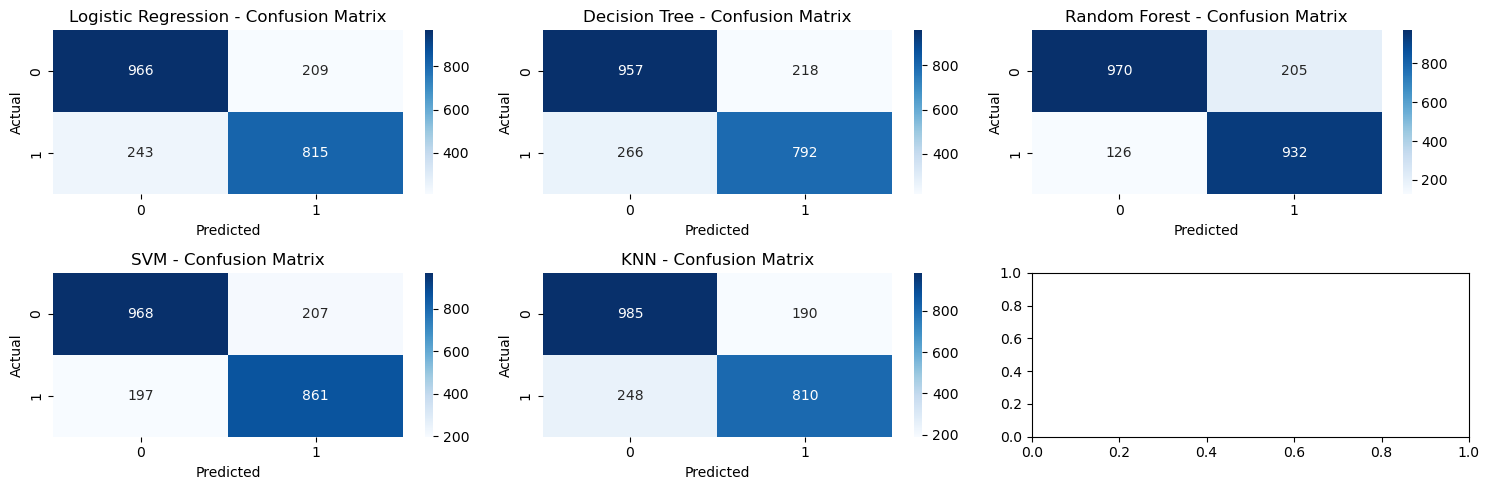

In [51]:

from sklearn.metrics import confusion_matrix

# Compute Confusion Matrices
conf_matrices = {name: confusion_matrix(y_test, model.predict(X_test)) for name, model in models.items()}

# Create subplots dynamically
fig, axes = plt.subplots((len(conf_matrices) // 3) + 1, min(len(conf_matrices), 3), figsize=(15, 5))
axes = axes.flatten() if len(conf_matrices) > 1 else [axes]  # Handle single model case

# Plot confusion matrices
for ax, (name, cm) in zip(axes, conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f"{name} - Confusion Matrix")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()


In [52]:
# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print("\nModel Performance Metrics:\n", results_df)


Model Performance Metrics:
                      Accuracy (%)  Precision    Recall  F1-score   AUC-ROC
Logistic Regression         79.76   0.795898  0.770321  0.782901  0.872966
Decision Tree               78.33   0.784158  0.748582  0.765957  0.781525
Random Forest               85.18   0.819701  0.880907  0.849203  0.914985
SVM                         81.91   0.806180  0.813800  0.809972  0.891923
KNN                         80.39   0.810000  0.765595  0.787172  0.877862


### Visualization & model comparsion

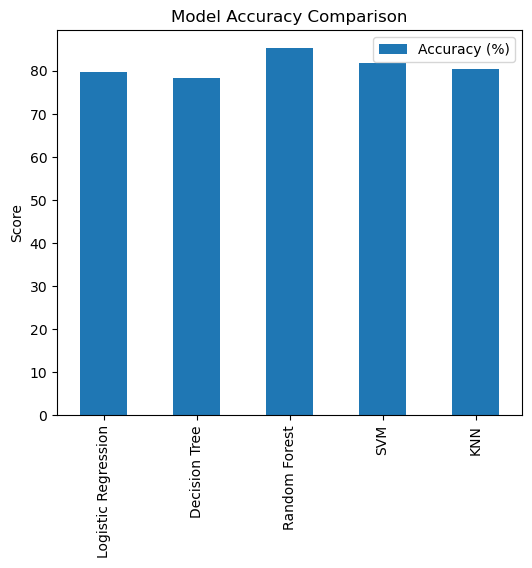

In [53]:
# Visualization of Performance Metrics
fig, ax = plt.subplots(figsize=(6, 5))
results_df[['Accuracy (%)']].plot(kind='bar', ax=ax)
ax.set_title("Model Accuracy Comparison")
ax.set_ylabel("Score")

ax.set_xticklabels(results_df.index)
plt.show()


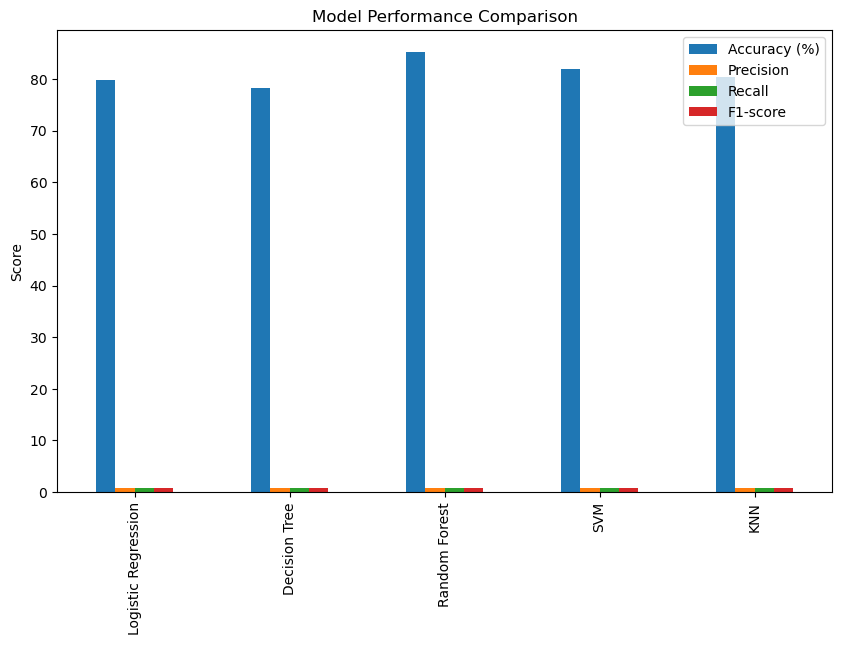

In [54]:
# Visualization of Performance Metrics
fig, ax = plt.subplots(figsize=(10, 6))
results_df[['Accuracy (%)', 'Precision', 'Recall', 'F1-score']].plot(kind='bar', ax=ax)
ax.set_title("Model Performance Comparison")
ax.set_ylabel("Score")

ax.set_xticklabels(results_df.index)
plt.show()


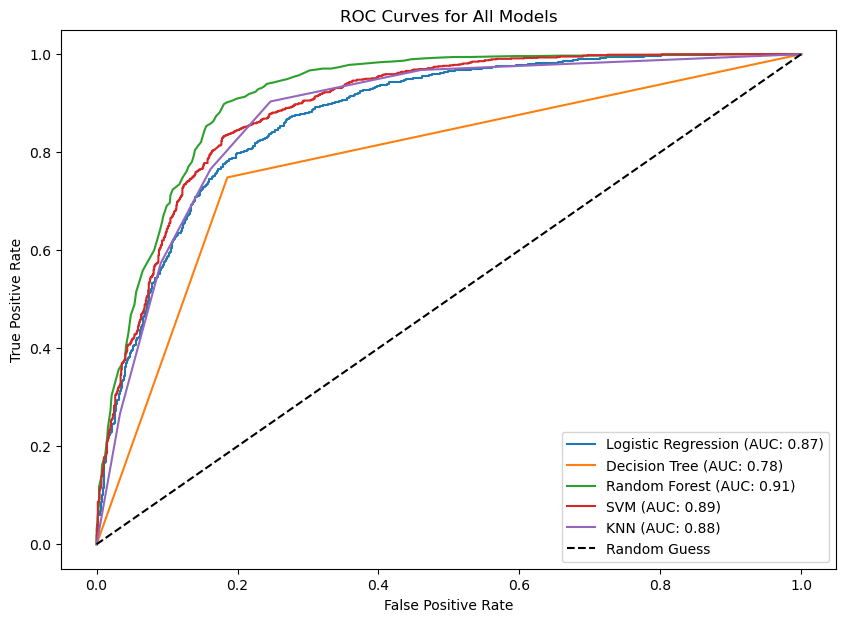

In [55]:
# Plot ROC Curves for all models
plt.figure(figsize=(10, 7))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_pred_proba = model.decision_function(X_test)  # For SVM

    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC: {roc_auc_score(y_test, y_pred_proba):.2f})")

# Plot Random Guess Diagonal Line
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")

# Labels and Title
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for All Models")
plt.legend()
plt.show()



In [56]:
# Print Classification Reports
for name, report in results.items():
    print(f"\nClassification Report for {name}:\n", classification_report(y_test, models[name].predict(X_test)))


Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81      1175
           1       0.80      0.77      0.78      1058

    accuracy                           0.80      2233
   macro avg       0.80      0.80      0.80      2233
weighted avg       0.80      0.80      0.80      2233


Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.78      0.81      0.80      1175
           1       0.78      0.75      0.77      1058

    accuracy                           0.78      2233
   macro avg       0.78      0.78      0.78      2233
weighted avg       0.78      0.78      0.78      2233


Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.89      0.83      0.85      1175
           1       0.82      0.88      0.85      1058

    accuracy                           0.85    

In [57]:
# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print("\nModel Performance Metrics (in %):\n", results_df)

# Identify the best model based on accuracy
best_model = results_df["Accuracy (%)"].idxmax()
best_accuracy = results_df["Accuracy (%)"].max()
print(f"\n Best Model: {best_model} with {best_accuracy:.2f}% accuracy")


Model Performance Metrics (in %):
                      Accuracy (%)  Precision    Recall  F1-score   AUC-ROC
Logistic Regression         79.76   0.795898  0.770321  0.782901  0.872966
Decision Tree               78.33   0.784158  0.748582  0.765957  0.781525
Random Forest               85.18   0.819701  0.880907  0.849203  0.914985
SVM                         81.91   0.806180  0.813800  0.809972  0.891923
KNN                         80.39   0.810000  0.765595  0.787172  0.877862

 Best Model: Random Forest with 85.18% accuracy


In [59]:

# Create a DataFrame to compare actual vs predicted
predictions_df = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred_best,     #contains probabilities from the model for subscribing.
    "Subscription Probability (%)": (y_pred_proba_best * 100).round(2)  #converts into % and round up by 2 decimal
})

# Add a readable result column(if 1=subscribe, 0=not subscribe.)
predictions_df["Prediction Result"] = predictions_df["Predicted"].apply(        
    lambda x: "Will Subscribe" if x == 1 else " Will Not Subscribe"
)

# Display the first 10 predictions
print("\n🔹 Predictions on Test Set (First 10 rows):")
print(predictions_df.head(10))

# Calculate and display overall accuracy of the best model
accuracy = accuracy_score(y_test, y_pred_best) * 100
print(f"\n🔹 Overall Accuracy of Best Model ({best_model_name}): {accuracy:.2f}%")   #Displays the accuracy rounded to 2 decimal places.



🔹 Predictions on Test Set (First 10 rows):
   Actual  Predicted  Subscription Probability (%)    Prediction Result
0       0          1                          64.0       Will Subscribe
1       1          1                          72.0       Will Subscribe
2       0          1                          56.0       Will Subscribe
3       0          0                           1.0   Will Not Subscribe
4       1          1                          88.0       Will Subscribe
5       0          0                           1.0   Will Not Subscribe
6       0          0                          10.0   Will Not Subscribe
7       1          0                          16.0   Will Not Subscribe
8       1          1                          81.0       Will Subscribe
9       1          1                          76.0       Will Subscribe

🔹 Overall Accuracy of Best Model (Random Forest): 85.22%
